In [1]:
#import everything
import numpy as np
import linreg as lin
from sklearn.ensemble import RandomForestClassifier
import gradientdescent as gd
import logreg as log
import cluster as cl
import pca
import matplotlib.pyplot as plt
from plot import *

In [2]:
# Exercise 2
#load data
wine_train = np.loadtxt("data/redwine_training.txt")
names = ["Intercept", "Fixed acidity", "Volatile acidity","Citric acid","Residual sugar","Chlorides","Free sulfur dioxide",
         "Total sulfur dioxide", "Density","pH","Sulfates","Alcohol"]
#separate data
wine_x_train = wine_train[:, :-1]
wine_x_train = lin.normalize_data(source=wine_train[:, :-1], target=wine_x_train)
wine_x_train_col1 = wine_x_train[:, :1]
wine_y_train = wine_train[:, -1:]

# Exercise 2b
weights_one = lin.multivarlinreg(wine_x_train_col1, wine_y_train)
print("Weights for first feature:")
lin.print_names(weights_one, names)

#Exercise 2c
weights_full = lin.multivarlinreg(wine_x_train, wine_y_train)
print("Weights for all features:")
lin.print_names(weights_full, names)

Weights for first feature:
Intercept:  [5.626]
Fixed acidity:  [0.08766808]


Weights for all features:
Intercept:  [5.626]
Fixed acidity:  [0.03409503]
Volatile acidity:  [-0.19185531]
Citric acid:  [0.00506797]
Residual sugar:  [0.06966651]
Chlorides:  [-0.13472303]
Free sulfur dioxide:  [0.05831775]
Total sulfur dioxide:  [-0.12812179]
Density:  [-0.0894315]
pH:  [-0.06780943]
Sulfates:  [0.15031245]
Alcohol:  [0.24954306]




In [3]:
# Exercise 3
#load data
wine_test = np.loadtxt("data/redwine_testing.txt")
#separate data
wine_x_test = wine_test[:, :-1]
wine_x_test = lin.normalize_data(source=wine_train[:, :-1], target=wine_x_test)
wine_x_test_col1 = wine_x_test[:, :1]
wine_y_test = wine_test[:, -1:]

# Exercise 3b
rmse_one = lin.test(weights_one, wine_x_test_col1, wine_y_test)
print(f"RMSE for first feature: {rmse_one}")

# Exercise 3c
rmse_full = lin.test(weights_full, wine_x_test, wine_y_test)
print(f"RMSE for all features: {rmse_full}")

RMSE for first feature: 0.7860892754162222
RMSE for all features: 0.6447172773067071


In [4]:
# Exercise 5
# read in the data
weed_train = np.loadtxt('data/IDSWeedCropTrain.csv', delimiter = ',')
weed_test = np.loadtxt('data/IDSWeedCropTest.csv', delimiter = ',')

# split input variables and labels
weed_x_train = weed_train[:,:-1]
weed_y_train = weed_train[:,-1]
weed_x_test = weed_test[:,:-1]
weed_y_test = weed_test[:,-1]

#create forest
RF = RandomForestClassifier(n_estimators=50)
RF = RF.fit(weed_x_train, weed_y_train)
RF_score = RF.score(weed_x_test, weed_y_test)
print(f" Accuracy of Random Forest: {RF_score}")

 Accuracy of Random Forest: 0.9668989547038328


C:\Users\mahdi\OneDrive - Københavns Universitet\ids\ids\Assignment5\gradientdescent.py:40: RuntimeWarning: invalid value encountered in double_scalars
  new_x = old_x + m*learning_rate


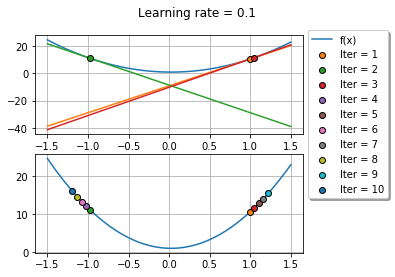

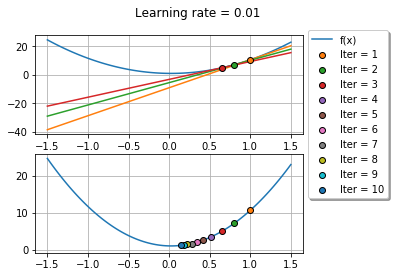

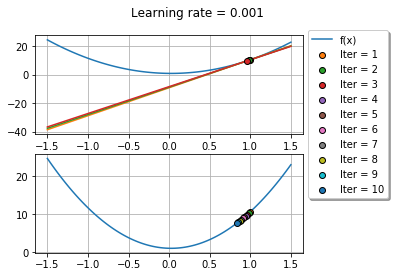

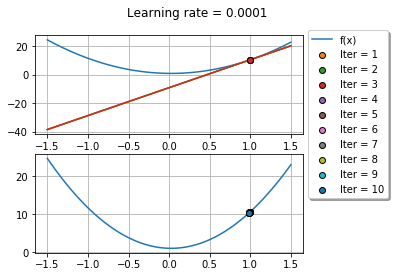

Leaning Rate: 0.1, Iteration: 10000, Value: nan
Leaning Rate: 0.01, Iteration: 116, Value: 0.9938268478110839
Leaning Rate: 0.001, Iteration: 1273, Value: 0.993826847811084
Leaning Rate: 0.0001, Iteration: 10000, Value: 0.993826847811084


In [5]:
# Exercise 6
x = np.linspace(-1.5, 1.5, 100)
rates = [0.1, 0.01, 0.001, 0.0001]
iterations = []
function_values = []

for i in rates:
    i, y = gd.gradient_descent(x, i)
    iterations.append(i)
    function_values.append(y)
    
for i in range(len(rates)):
    print(f"Leaning Rate: {rates[i]}, Iteration: {iterations[i]}, Value: {function_values[i]}")

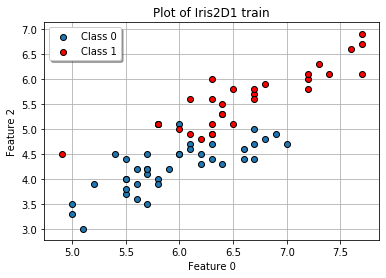

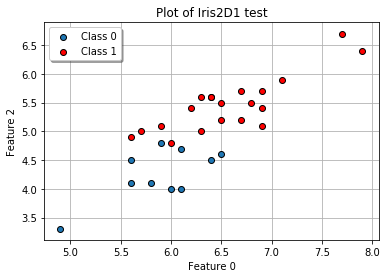

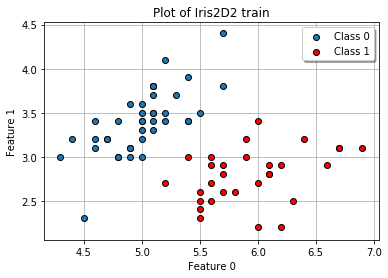

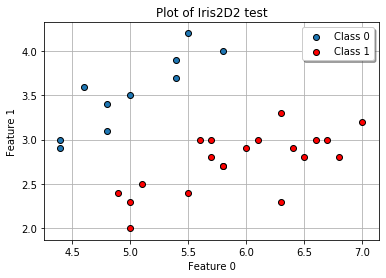

In [6]:
# Exercise 7
Iris2D1_train = np.loadtxt("data/Iris2D1_train.txt")
Iris2D1_test = np.loadtxt("data/Iris2D1_test.txt")
Iris2D2_train = np.loadtxt("data/Iris2D2_train.txt")
Iris2D2_test = np.loadtxt("data/Iris2D2_test.txt")

# Exercise 7.1
log.plot_iris(Iris2D1_train, "Iris2D1 train")
log.plot_iris(Iris2D1_test, "Iris2D1 test")
log.plot_iris(Iris2D2_train, "Iris2D2 train")
log.plot_iris(Iris2D2_test, "Iris2D2 test")

In [7]:
# Exercise 7.3
e1, w1, p1 = log.log_regression(Iris2D1_train, Iris2D1_test)
e2, w2, p2 = log.log_regression(Iris2D2_train, Iris2D2_test)
# Exercise 7.4
print(f"Iris2D1 Error: {e1}\nIris2D1 Weights:\n{w1}")
print("\n")
print(f"Iris2D2 Error: {e2}\nIris2D2 Weights:\n{w2}")

Iris2D1 Error: 0.13333333333333333
Iris2D1 Weights:
[[-11.75591083]
 [ -4.73140783]
 [  8.35634007]]


Iris2D2 Error: 0.0
Iris2D2 Weights:
[[-29.78280183]
 [ 12.91888741]
 [-12.88208541]]


Cluster: 1
Proportion of 1: 83.33%
Proportion of 7: 8.94%
Proportion of 9: 7.72%
Cluster: 2
Proportion of 1: 85.35%
Proportion of 7: 11.62%
Proportion of 9: 3.03%
Cluster: 3
Proportion of 1: 0.15%
Proportion of 7: 48.46%
Proportion of 9: 51.4%


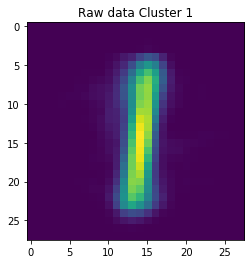

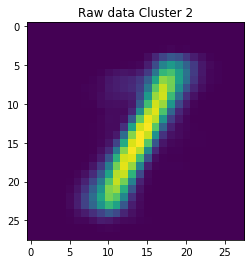

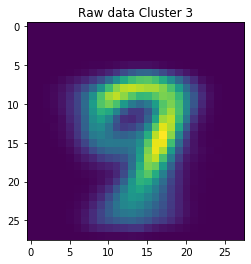

In [8]:
# Exercise 9
# load data
digits = np.loadtxt("data/MNIST_179_digits.txt")
labels = np.loadtxt("data/MNIST_179_labels.txt")

# Exercise 9a
# get proportions and pictures
numbers = [1,7,9]
cl.get_prop_plot(3, numbers, digits, labels, "Raw data Cluster ")

In [9]:
# Exercise 9b
k_list = [1, 3, 5, 7, 9, 11]
cl.find_best_k(k_list, digits, labels)

Loss for 1 neighbors: 0.05577777777777777
Loss for 3 neighbors: 0.05822222222222222
Loss for 5 neighbors: 0.061111111111111116
Loss for 7 neighbors: 0.06644444444444446
Loss for 9 neighbors: 0.06577777777777778
Loss for 11 neighbors: 0.06844444444444446
====== Results ======
Best k: 1
Accuracy: 0.9442222222222222


1

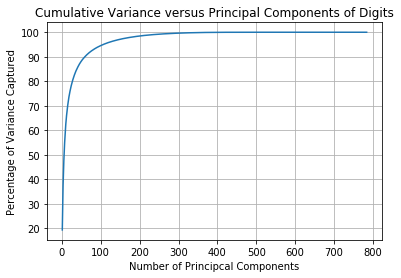

In [10]:
# Exercise 10
# Exercise 10a
e_vec, e_val = pca.pca(digits)
cum_variance = np.cumsum(e_val/sum(e_val)) * 100
count = list(range(1, len(e_val)+1))
plt.plot(count, cum_variance)
plot_template(title= 'Cumulative Variance versus Principal Components of Digits',
             xlabel='Number of Principcal Components',
             ylabel='Percentage of Variance Captured',
             equal_axis=False, save = False)

1 dimensions:
Cluster: 1
Proportion of 1: 5.48%
Proportion of 7: 46.97%
Proportion of 9: 47.55%
Cluster: 2
Proportion of 1: 95.7%
Proportion of 7: 3.49%
Proportion of 9: 0.81%
Cluster: 3
Proportion of 1: 0.0%
Proportion of 7: 49.01%
Proportion of 9: 50.99%


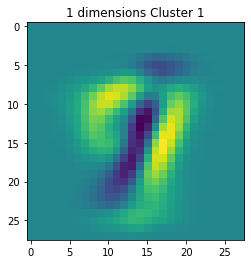

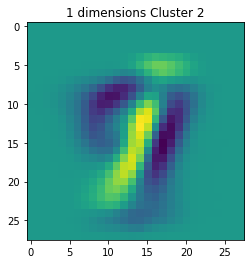

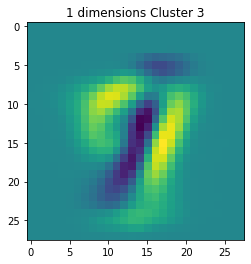

20 dimensions:
Cluster: 1
Proportion of 1: 83.33%
Proportion of 7: 8.94%
Proportion of 9: 7.72%
Cluster: 2
Proportion of 1: 86.22%
Proportion of 7: 11.22%
Proportion of 9: 2.55%
Cluster: 3
Proportion of 1: 0.15%
Proportion of 7: 48.46%
Proportion of 9: 51.39%


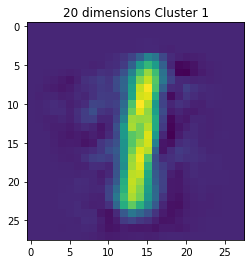

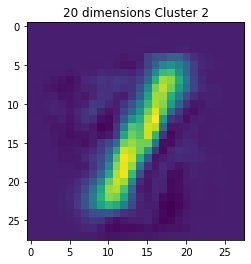

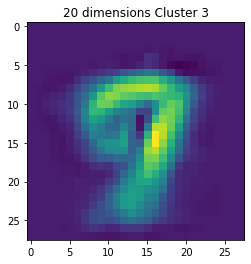

200 dimensions:
Cluster: 1
Proportion of 1: 83.33%
Proportion of 7: 8.94%
Proportion of 9: 7.72%
Cluster: 2
Proportion of 1: 85.35%
Proportion of 7: 11.62%
Proportion of 9: 3.03%
Cluster: 3
Proportion of 1: 0.15%
Proportion of 7: 48.46%
Proportion of 9: 51.4%


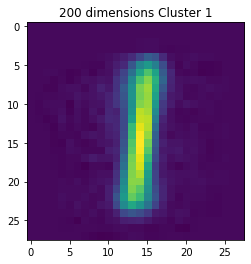

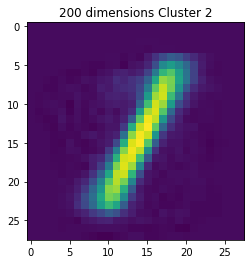

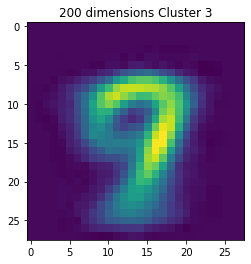

In [11]:
# Exercise 10b
dimensions = [1, 20, 200]

for i in dimensions:
    cl.get_prop_plot_mds(3, numbers, digits, labels, i, " dimensions Cluster ")

In [12]:
# Exercise 10c
for i in dimensions[1:]:
    cl.mds_acc(i, k_list, digits, labels)

20 dimensions:
Loss for 1 neighbors: 0.04977777777777779
Loss for 3 neighbors: 0.05311111111111111
Loss for 5 neighbors: 0.05444444444444445
Loss for 7 neighbors: 0.05311111111111113
Loss for 9 neighbors: 0.057777777777777775
Loss for 11 neighbors: 0.061555555555555544
====== Results ======
Best k: 1
Accuracy: 0.9502222222222222
Best K: 1 Accuracy: 1.0
200 dimensions:
Loss for 1 neighbors: 0.05577777777777777
Loss for 3 neighbors: 0.057777777777777775
Loss for 5 neighbors: 0.06066666666666667
Loss for 7 neighbors: 0.06555555555555556
Loss for 9 neighbors: 0.06533333333333333
Loss for 11 neighbors: 0.06733333333333333
====== Results ======
Best k: 1
Accuracy: 0.9442222222222222
Best K: 1 Accuracy: 1.0
